In [72]:
# Two main data structures in pandas:
# 1. Series -> 1D labeled array (like a single column)
# 2. DataFrame -> 2D labeled data structure (like an Excel sheet)

import pandas as pd
from IPython.display import display, HTML
import numpy as np
import re

In [73]:
# Series
s = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
print(s)

# DataFrame from dict
df = pd.DataFrame({
    "Name": ["Alice", "Bob", "Chalie", "Zak"],
    "Age": [25, 32, 19, 28],
    "Score": [88, 96, 99, 75]
})

display(HTML(df.to_html()))

a    10
b    20
c    30
dtype: int64


,Name,Age,Score
0,Alice,25,88
1,Bob,32,96
2,Chalie,19,99
3,Zak,28,75


In [74]:
# creating a simulated dataset
data = {
    "Order ID" : range(1001, 1011),
    "Customer Name" : ["Alice", "BOB", "Charlie", "David", "Eva", "Frank", " Grace", "henry", "Ivy", "jack "],
    "Product": ["Laptop", "Phone", "Tablet", "Laptop", "Headphones", "Phone", "Laptop", "Tablet", "Headphones", "Phone"],
    "Category": ["Electronics", "Electrnics", "Electronics", "Electronics", "Accessories", "Electronics", "Electronics", "Electrnics", "Accessories", "Electronics"],
    "Order Date": ["2023-01-15", "15/02/2023", "2023/03/10", "2023-04-05", "05-05-2023", "2023-06-20", "2023/07/25", "2023-08-15", "15-09-2023", "2023-10-10"],
    "Quantity": [2, "3", 1, 5, "2", 1, 4, "three", 2, 3],
    "Price": [800, 500, 300, 800, 50, 500, 800, 300, 50, 500],
    "Total": [1600, 1500, np.nan, 4000, 100, 500, np.nan, 900, 100, 1500],
    "Country": ["USA", "usa", None, "Canada", "CANADA", "Mexico", "USA", "mexico", "", "Usa"],
    "City": ['New York ', ' los angeles', 'chiCago', 'Toronto', ' vancouver ', 'MexicoCity', 'san francisco ', ' guadalajara', 'monterrey ', 'Houston']
}

In [75]:
df = pd.DataFrame(data)

df.to_csv("sales_data.csv", index=False)

display(HTML(df.to_html()))

,Order ID,Customer Name,Product,Category,Order Date,Quantity,Price,Total,Country,City
0,1001,Alice,Laptop,Electronics,2023-01-15,2,800,1600.0,USA,New York
1,1002,BOB,Phone,Electrnics,15/02/2023,3,500,1500.0,usa,los angeles
2,1003,Charlie,Tablet,Electronics,2023/03/10,1,300,NaN,None,chiCago
3,1004,David,Laptop,Electronics,2023-04-05,5,800,4000.0,Canada,Toronto
4,1005,Eva,Headphones,Accessories,05-05-2023,2,50,100.0,CANADA,vancouver
5,1006,Frank,Phone,Electronics,2023-06-20,1,500,500.0,Mexico,MexicoCity
6,1007,Grace,Laptop,Electronics,2023/07/25,4,800,NaN,USA,san francisco
7,1008,henry,Tablet,Electrnics,2023-08-15,three,300,900.0,mexico,guadalajara
8,1009,Ivy,Headphones,Accessories,15-09-2023,2,50,100.0,,monterrey
9,1010,jack,Phone,Electronics,2023-10-10,3,500,1500.0,Usa,Houston


In [76]:
# Steps:
# 1. Load and inspect the data
# 2. Clean messy strings (strip, lower, fix typos)
# 3. Fix dates (with pd.to_datetime)
# 4. Handle numeric issues (pd.to_numeric)
# 5. Fill missing totals by recalculating Quantity x Price
# 6. Standardize country names
# 7. Group & analyze sales

### Step-1: Load and inspect the data

In [77]:
df = pd.read_csv("sales_data.csv")

df.head()   # view the first 5 rows

,Order ID,Customer Name,Product,Category,Order Date,Quantity,Price,Total,Country,City
0,1001,Alice,Laptop,Electronics,2023-01-15,2,800,1600.0,USA,New York
1,1002,BOB,Phone,Electrnics,15/02/2023,3,500,1500.0,usa,los angeles
2,1003,Charlie,Tablet,Electronics,2023/03/10,1,300,NaN,NaN,chiCago
3,1004,David,Laptop,Electronics,2023-04-05,5,800,4000.0,Canada,Toronto
4,1005,Eva,Headphones,Accessories,05-05-2023,2,50,100.0,CANADA,vancouver


In [78]:
# basic dataset info
# shows non-null values
# shows column data types (important to find mismatches like numbers stored as strings)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       10 non-null     int64  
 1   Customer Name  10 non-null     object 
 2   Product        10 non-null     object 
 3   Category       10 non-null     object 
 4   Order Date     10 non-null     object 
 5   Quantity       10 non-null     object 
 6   Price          10 non-null     int64  
 7   Total          8 non-null      float64
 8   Country        8 non-null      object 
 9   City           10 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 932.0+ bytes


In [79]:
# quick statistics
# gives min, max, mean and percentiles for NUMERIC columns
# helps spot unusual values (eg., negative prices, wrong totals)

df.describe()

,Order ID,Price,Total
count,10.00000,10.000000,8.000000
mean,1005.50000,460.000000,1275.000000
std,3.02765,286.550364,1261.235222
min,1001.00000,50.000000,100.000000
25%,1003.25000,300.000000,400.000000
50%,1005.50000,500.000000,1200.000000
75%,1007.75000,725.000000,1525.000000
max,1010.00000,800.000000,4000.000000


In [80]:
# check for missing values
df.isnull().sum()   # tells us how many missing values are in each column

Order ID         0
Customer Name    0
Product          0
Category         0
Order Date       0
Quantity         0
Price            0
Total            2
Country          2
City             0
dtype: int64

### Step-2: Data Cleaning (Strings & Categories) on our sales_data.csv

In [81]:
# standardize column names
# messy column names cause headaches later.
# making them lowercase, strip spaces, and replace spaces with _

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

,order_id,customer_name,product,category,order_date,quantity,price,total,country,city
0,1001,Alice,Laptop,Electronics,2023-01-15,2,800,1600.0,USA,New York
1,1002,BOB,Phone,Electrnics,15/02/2023,3,500,1500.0,usa,los angeles
2,1003,Charlie,Tablet,Electronics,2023/03/10,1,300,NaN,NaN,chiCago
3,1004,David,Laptop,Electronics,2023-04-05,5,800,4000.0,Canada,Toronto
4,1005,Eva,Headphones,Accessories,05-05-2023,2,50,100.0,CANADA,vancouver


In [82]:
# fix extra spaces & case issues in text columns

# clean city names
# remove leading/trailing spaces and convert to title case for consistent capitalization
df['city'] = df['city'].str.strip().str.title()


# standardize country names and fill NaN with Unknown
df['country'] = df['country'].str.strip().str.title().fillna('Unknown')


# standardize customer names
df['customer_name'] = df['customer_name'].str.strip().str.title()


# fix category typos
df['category'] = df['category'].replace("Electrnics", "Electronics")


# convert 'Quantity' to numeric (handle text like 'three')
quantity_map = {
    'three' : 3
}
df['quantity'] = df['quantity'].replace(quantity_map).astype(int)


# standardize order_date to YYYY-MM-DD
# r'...'    -> raw string
# \d        -> digit matcher
# {1, 2}    -> quantity (match any 1 or 2 digit number)
# [-/]      -> character choice, [] square brackets means "match any ONE of these characters"
# \d{4}     -> match exactly 4 digits
def quick_date_clean(date_str):
    date_str = str(date_str).strip()
    # handle DD/MM/YYYY and DD-MM-YYYY
    if re.match(r'\d{1,2}[-/]\d{1,2}[-/]\d{4}', date_str):
        return pd.to_datetime(date_str, dayfirst=True).strftime('%Y-%m-%d')
    else:
        return pd.to_datetime(date_str).strftime('%Y-%m-%d')
    
df['order_date'] = df['order_date'].apply(quick_date_clean)


# calculate missing total values
df['total'] = df['total'].fillna(df['quantity']*df['price'])

df.to_csv('cleaned_sales_data.csv', index=False)
df.head()

,order_id,customer_name,product,category,order_date,quantity,price,total,country,city
0,1001,Alice,Laptop,Electronics,2023-01-15,2,800,1600.0,Usa,New York
1,1002,Bob,Phone,Electronics,2023-02-15,3,500,1500.0,Usa,Los Angeles
2,1003,Charlie,Tablet,Electronics,2023-03-10,1,300,300.0,Unknown,Chicago
3,1004,David,Laptop,Electronics,2023-04-05,5,800,4000.0,Canada,Toronto
4,1005,Eva,Headphones,Accessories,2023-05-05,2,50,100.0,Canada,Vancouver


### Step-3 Numeric Data Cleaning and Outlier Handling

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       10 non-null     int64  
 1   customer_name  10 non-null     object 
 2   product        10 non-null     object 
 3   category       10 non-null     object 
 4   order_date     10 non-null     object 
 5   quantity       10 non-null     int64  
 6   price          10 non-null     int64  
 7   total          10 non-null     float64
 8   country        10 non-null     object 
 9   city           10 non-null     object 
dtypes: float64(1), int64(3), object(6)
memory usage: 932.0+ bytes


In [84]:
# identify numeric columns - tells us which columns contain numbers
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numeric_cols)

Index(['order_id', 'quantity', 'price', 'total'], dtype='object')


In [85]:
# detect negatives where they shouldn't exist
# row = df['quantity'] <= 0
# column = 'quantity'
df.loc[df['quantity'] <= 0, 'quantity'] = 1     # set to 1 as default

In [86]:
# detect unrealistic values using basic thresholds
# eg.
# price shouldn't be above $10,000 for normal retail
# quantity shouldn't be above 1,000 for single orders

# check first
df[df['price'] > 10_000]
df[df['quantity'] > 1_000]

# handle by capping
df['price'] = df['price'].clip(upper=10_000)
df['quantity'] = df['quantity'].clip(upper=1_000)

In [87]:
# detect outliers with statistics (IQR method)
# the interquartile range (IQR) method helps flag values far outside normal distribution
# formuala:
# 1. IQR = Q3 - Q1
# 2. Lower Bound = Q1 - 1.5*IQR
# 3. Upper Bound = Q3 + 1.5*IQR

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print(Q1, Q3, IQR, lower_bound, upper_bound)

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
print(outliers)

300.0 725.0 425.0 -337.5 1362.5
Empty DataFrame
Columns: [order_id, customer_name, product, category, order_date, quantity, price, total, country, city]
Index: []


In [88]:
# handling missing numbers
df['price'] = df['price'].fillna(df['price'].median())
df['quantity'] = df['quantity'].fillna(df['quantity'].median())

# when to use mean, median and mode?

# mean: mean is calculated by summing all values and dividing by the count. it is highly sensitive to extreme values or outliers. if your data has a large outlier, the mean will be pulled in that direction, making it a less accurate representation of the typical value.
# when to use? 
# use the mean for numerical data that follows a normal distribution (a symmetrical, bell-shaped curve) and has few to no outliers. in this case, the mean is a good, unbiased estimate for the missing data.

# median: it is the middle value in a SORTED dataset. it's a robust and not affected by outliers because it only considers the positional order of the data. this makes it a more reliable measure of central tendency for skewed data.
# when to use?
# use the median for numerical data with a skewed distribution or when the data contains significant outliers. a common example is income data, which is often skewed by a few extremely high earners. the median provides a more accurate representation of the "typical" income than the mean.

# mode: it is the value that appears most frequently in a dataset. it is most useful for non-numeric data, but can also be used for numerical data with a small number of unique values.
# when to use?
# use the mode for categorical data (e.g., product categories, city names) where a mean or median is meaningless. for example, if you have missing values for a 'Country' column, using the most frequent country to fill in the blanks makes the most sense.

### Step-4: Extract useful time-based features

In [ ]:
# map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"
    
df['season'] = df['month'].apply(get_season)

### Step-5: Categorical data encoding

In [90]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['customer_name', 'product', 'category', 'order_date', 'country',
       'city'],
      dtype='object')


In [91]:
# encoding for analysis/ML
from sklearn.preprocessing import LabelEncoder

# label encoding is a technique used to convert categorical data into numerical data. it assigns a unique integer to each category BASED ON ITS ALPHABETICAL ORDER.
le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])

# one-hot encoding (turn categories into binary columns)
# df = pd.get_dummies(df, columns=['category'], drop_first=True)

In [92]:
df.head()

,order_id,customer_name,product,category,order_date,quantity,price,total,country,city,category_encoded
0,1001,Alice,Laptop,Electronics,2023-01-15,2,800,1600.0,Usa,New York,1
1,1002,Bob,Phone,Electronics,2023-02-15,3,500,1500.0,Usa,Los Angeles,1
2,1003,Charlie,Tablet,Electronics,2023-03-10,1,300,300.0,Unknown,Chicago,1
3,1004,David,Laptop,Electronics,2023-04-05,5,800,4000.0,Canada,Toronto,1
4,1005,Eva,Headphones,Accessories,2023-05-05,2,50,100.0,Canada,Vancouver,0


In [95]:
avg_price_per_cat = df.groupby('category')['price'].mean().reset_index()

print(avg_price_per_cat)
display(HTML(avg_price_per_cat.to_html()))

      category  price
0  Accessories   50.0
1  Electronics  562.5


,category,price
0,Accessories,50.0
1,Electronics,562.5


### Step:6 Detecting Outliers - Visualization

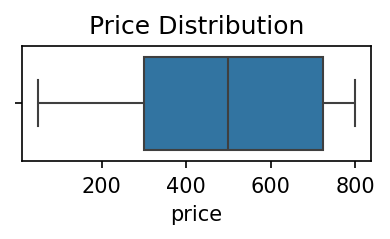

In [105]:
# boxplots are the easiest way
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(3, 1), dpi=150)
sns.boxplot(x=df['price'])
plt.title('Price Distribution')
plt.show()

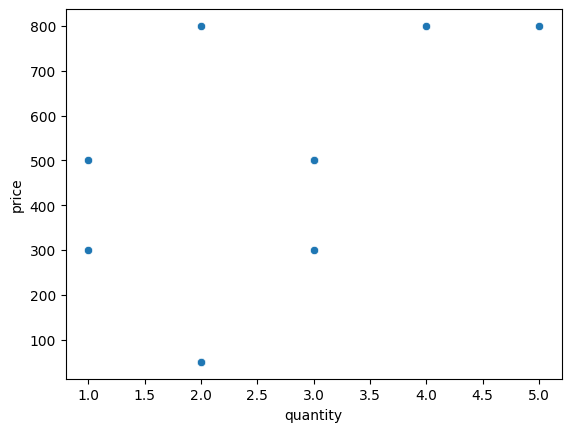

In [106]:
# checking scatter plot
sns.scatterplot(x='quantity', y='price', data=df)
plt.show()

### Step-7: Feature Enginnering

In [118]:
# feature engineering means creating new columns from existing data so that analysis & models can extract more insights.
df['purchase_date'] = pd.to_datetime(df['order_date'])

df['year'] = df['purchase_date'].dt.year
df['month'] = df['purchase_date'].dt.month
df['day'] = df['purchase_date'].dt.day
df['weekday'] = df['purchase_date'].dt.day_name()
df['is_weekend'] = df['purchase_date'].dt.weekday >= 5

In [119]:
# average price per category
df['avg_price_category'] = df.groupby('category')['price'].transform('mean')

In [120]:
df.head()

,order_id,customer_name,product,category,order_date,quantity,price,total,country,city,category_encoded,purchase_date,year,month,day,weekday,is_weekend,avg_price_category
0,1001,Alice,Laptop,Electronics,2023-01-15,2,800,1600.0,Usa,New York,1,2023-01-15,2023,1,15,Sunday,True,562.5
1,1002,Bob,Phone,Electronics,2023-02-15,3,500,1500.0,Usa,Los Angeles,1,2023-02-15,2023,2,15,Wednesday,False,562.5
2,1003,Charlie,Tablet,Electronics,2023-03-10,1,300,300.0,Unknown,Chicago,1,2023-03-10,2023,3,10,Friday,False,562.5
3,1004,David,Laptop,Electronics,2023-04-05,5,800,4000.0,Canada,Toronto,1,2023-04-05,2023,4,5,Wednesday,False,562.5
4,1005,Eva,Headphones,Accessories,2023-05-05,2,50,100.0,Canada,Vancouver,0,2023-05-05,2023,5,5,Friday,False,50.0


### Exploratory Data Analysis

In [122]:
# understanding the dataset structure
# before making plots, always check:
print(df.shape)                         # rows and columns
print(df.info())                       # data types & nulls
print(df.describe())                    # summary stats (numerical)
print(df.describe(include='object'))    # summary stats (categorical)

(10, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            10 non-null     int64         
 1   customer_name       10 non-null     object        
 2   product             10 non-null     object        
 3   category            10 non-null     object        
 4   order_date          10 non-null     object        
 5   quantity            10 non-null     int64         
 6   price               10 non-null     int64         
 7   total               10 non-null     float64       
 8   country             10 non-null     object        
 9   city                10 non-null     object        
 10  category_encoded    10 non-null     int64         
 11  purchase_date       10 non-null     datetime64[ns]
 12  year                10 non-null     int32         
 13  month               10 non-null     int32   

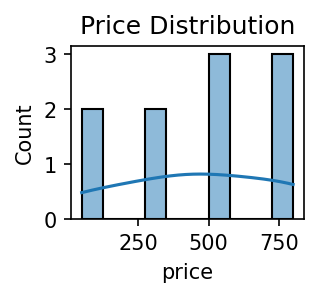

In [ ]:
# univariate analysis (one feature at a time)
# numerical columns - histogram and KDE (distribution curve)
plt.figure(figsize=(2,1.5), dpi=150)
sns.histplot(df['price'], kde=True, bins=10)
plt.title("Price Distribution")
plt.show()

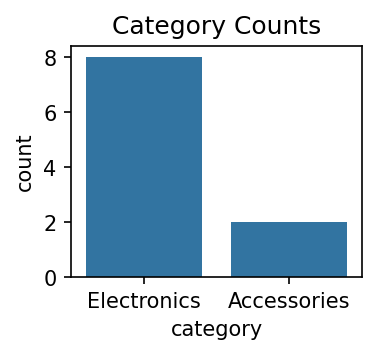

In [ ]:
# categorical columns (count plot)
plt.figure(figsize=(2.5, 2), dpi=150)
sns.countplot(x='category', data=df)
plt.title("Category Counts")
plt.show()

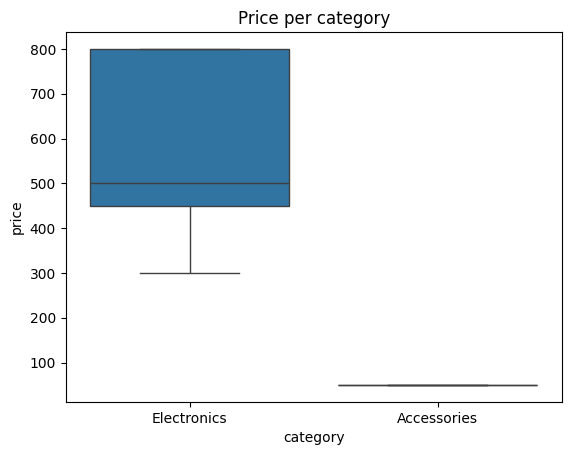

In [138]:
# bivariate analysis (two features together)
sns.boxplot(x='category', y='price', data=df)
plt.title("Price per category")
plt.show()

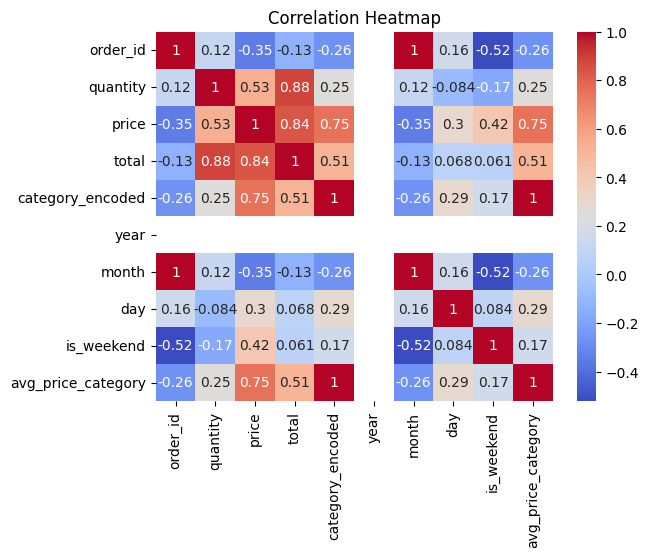

In [139]:
# correlation analysis (numerical relationship)
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

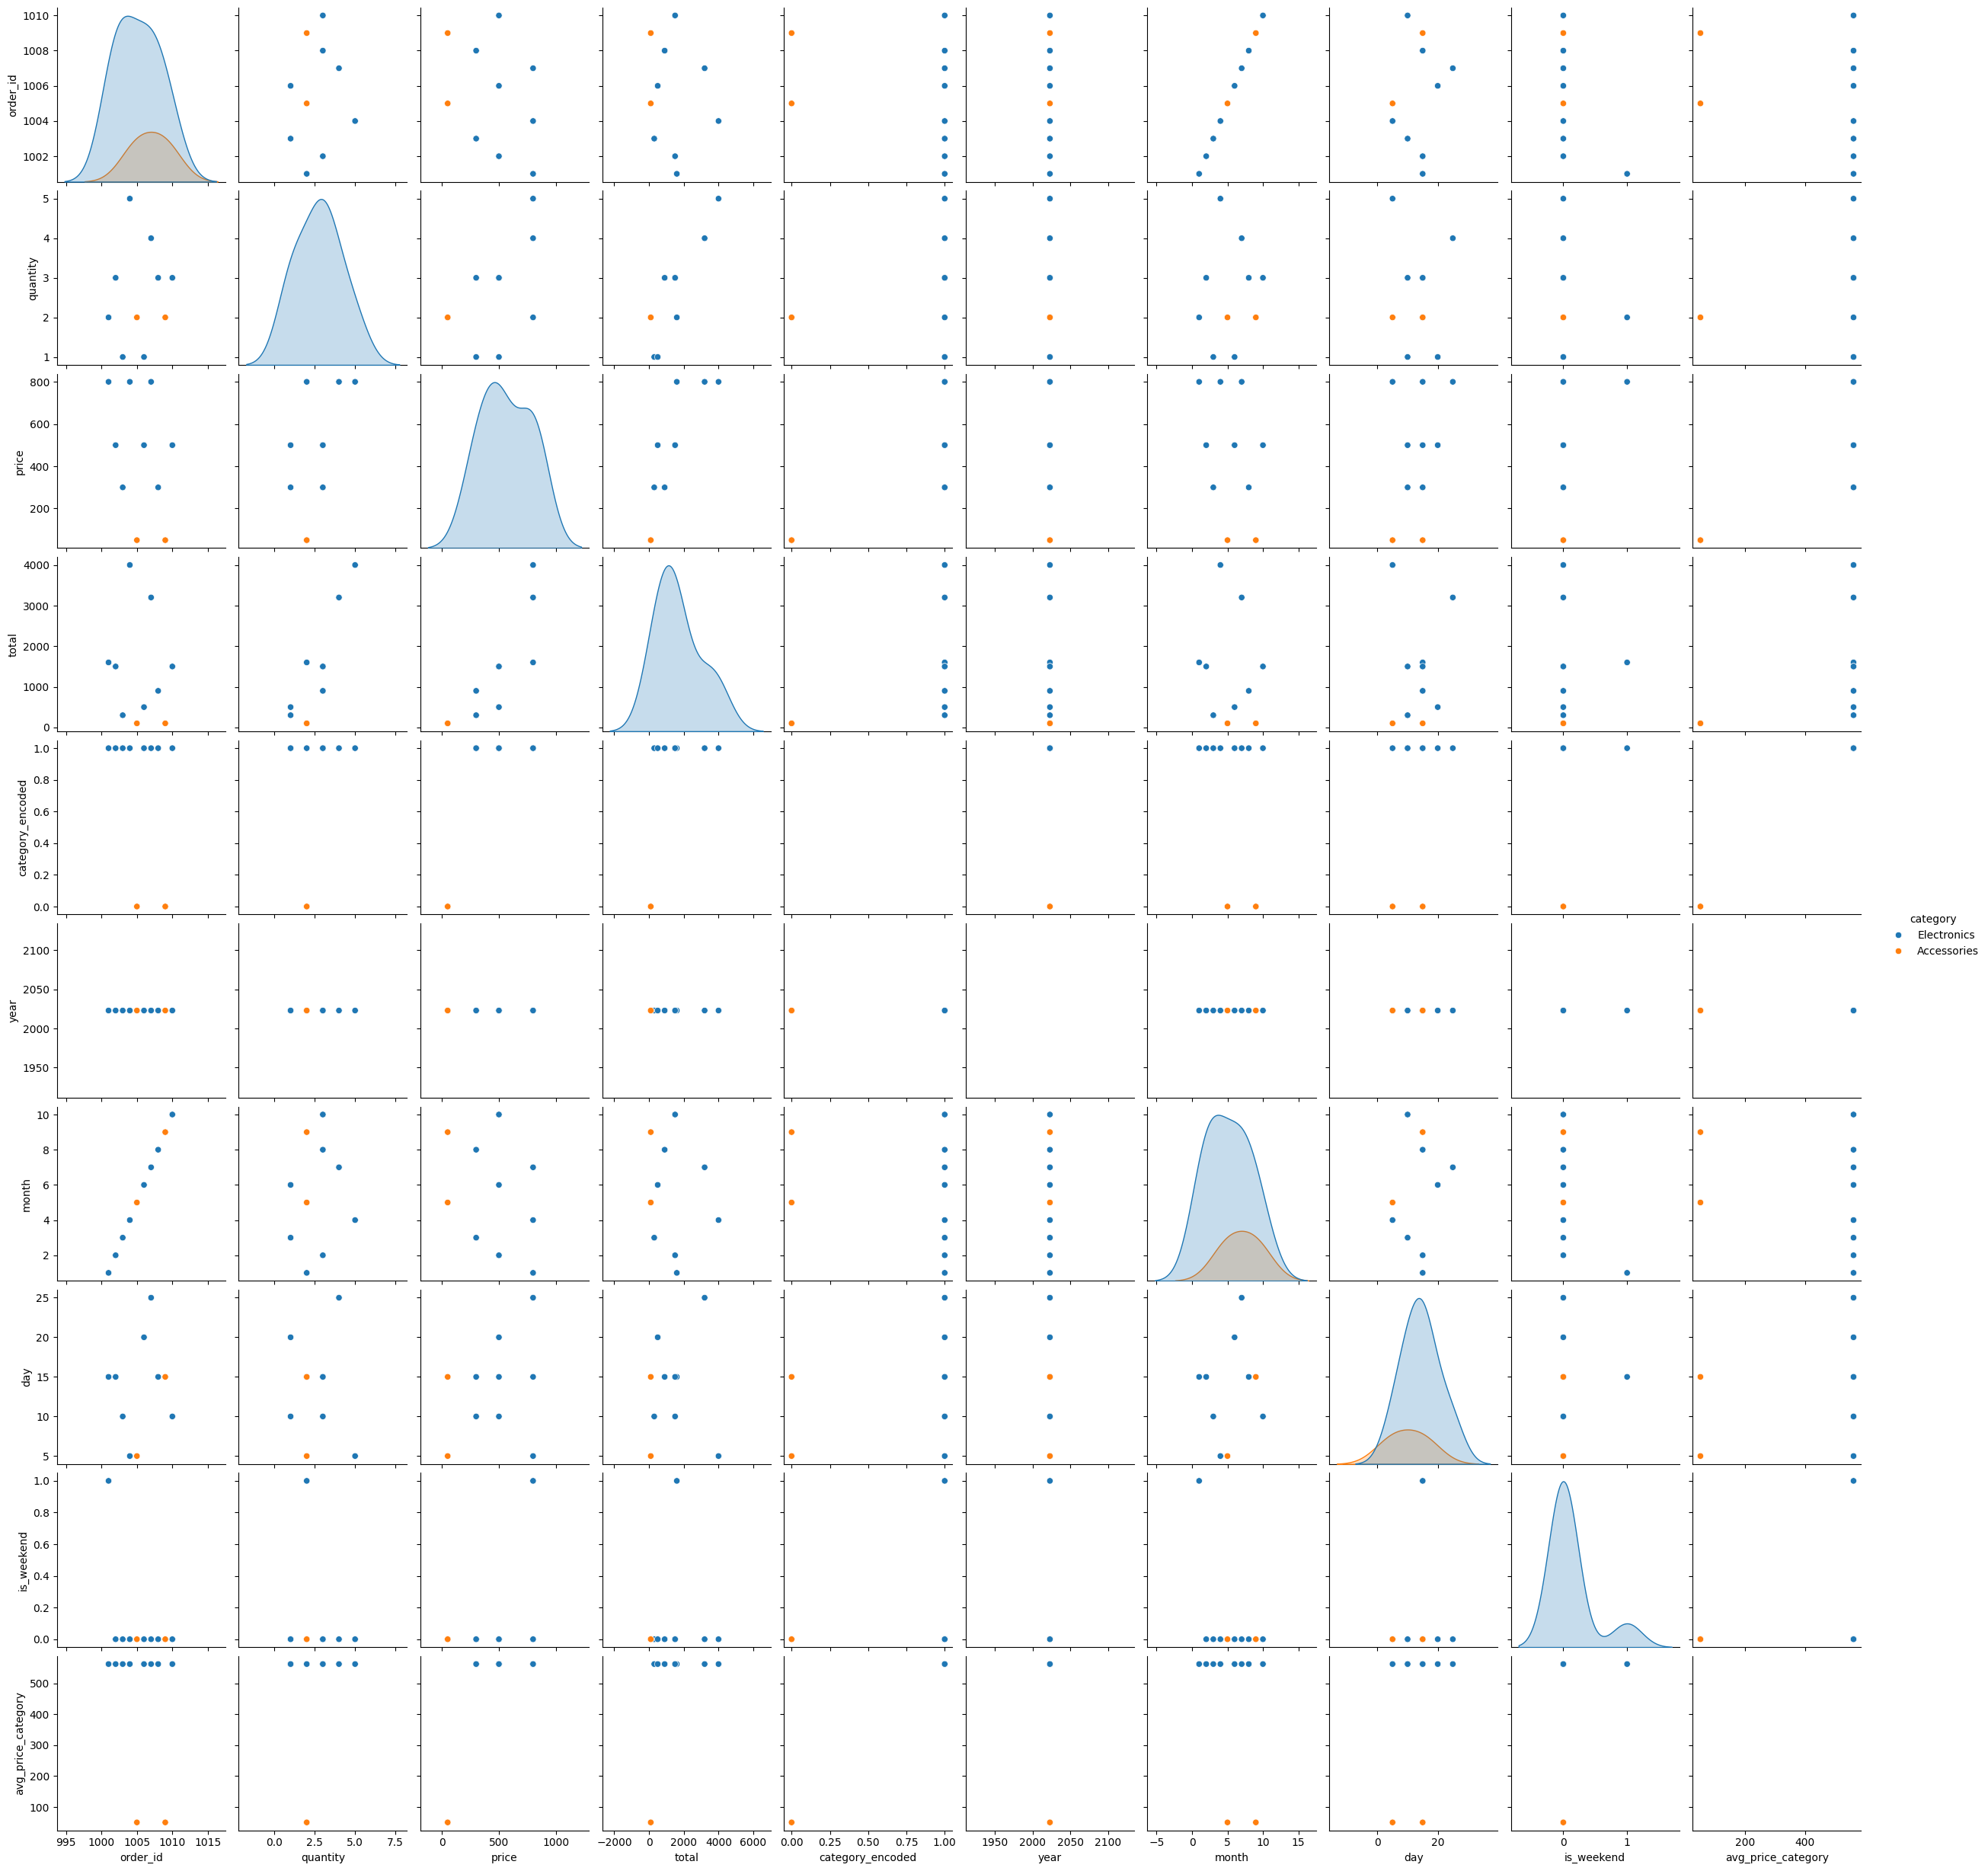

In [140]:
# pairplot
sns.pairplot(df, hue='category')
plt.show()